# INFO-F440 Big Data Algorithms
# Lecture 1: Feb 1, 2021


**Note there is homework at the end**

I have tried to pick the sizes of the examples to be large enough to show you what is going on, but small enough they they don't take too long to run. This whole notebook runs in a minute on my computer, and I hope it takes a similar amount of time on yours.

If you have any questions (or corrections!), please post on Teams.

# Timing functions

In class, I used some timing functions that I wrote that plot the runtimes of one or several univariate functions. These are meant to be easy to use and use 

First, here is some code to help us plot the runtimes of functions. The first is for a single function, and the second is for multiple ones. I use the [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) library.


In [12]:
import timeit
import matplotlib.pyplot as plt
import random


def plotruntime(f,r,trials=1,figsize=[3,3]):
    Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(r,Times)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    
def plotruntimes(functions,labels,r,trials=1,figsize=[3,3]):
    fig, ax = plt.subplots(figsize=figsize)
    for f,l in zip(functions,labels):
        Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
        ax.plot(r,Times,label=l)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    ax.set_title("Runtime plot: "+str(trials)+" trial"+("s" if trials>1 else ""))
    ax.legend()





## Using the timing functions

Here are some demos of using these functions.

For the single functions I called:

`plotruntime(f,range(1000,100000,10000),10)`

Here `f` is the function of one variable, the range indicates which values `f` will be run with, and 10 is the number of trials. More trials usually gives a smoother graph, but of course takes longer. Same with range, 
if I left out the step and had `range(1000,100000)` this would do 99000 different values of `n` instead of 100.


For the mupliple functions I have:

`plotruntimes([f,g],["f","g"],range(1000,10000,1000),10)`

You can see the only difference is now there is a list of functions, and a second list with the labels so you know which is which.

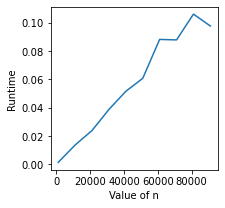

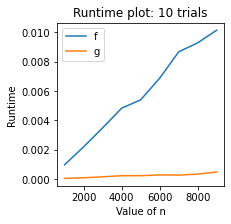

In [13]:
def f(n):
   A = [random.randint(0,1000) for x in range(n)] 

def g(n):
   A = [x for x in range(n)] 


    
plotruntime(f,range(1000,100000,10000),10)

plotruntimes([f,g],["f","g"],range(1000,10000,1000),10)




## Using lambda

Our plotting functions require that they be given function of one variable. But what if we have a function of more than one variable and we want to turn it into a function of one variable? We could do this by defining a new function, but Python allows an easier way by using what are known as lambda expressions, which are just inline nameless functions. It sounds complicated, but look at this code and you will see it is easy.

See the [docs](https://docs.python.org/3/tutorial/controlflow.html?highlight=lambda) for a full and short explanation.

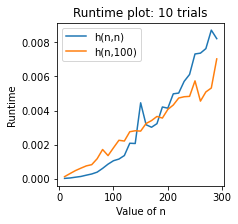

In [14]:
def h(n,m):
    return [(a,b) for a in range(n) for b in range(m)]


plotruntimes([lambda n:h(n,n),lambda n:h(n,200)],["h(n,n)","h(n,100)"],range(10,300,10),10)




# Intro: There are good and bad algorithms

The [Fibonacci numbers](https://mathworld.wolfram.com/FibonacciNumber.html) are usually defined as follows:

$Fib(N)=\begin{cases}0 & N=0 \\  1 & N=1  \\ Fib(N-1)+Fib(N-2) & \text{otherwise} \end{cases}$

This can be turned into code directy:

In [15]:
def Fib(N):
    if N==0:
        return 0
    if N==1:
        return 1
    return Fib(N-1)+Fib(N-2)

for N in range(40):
    print("Fib(",N,") is ",Fib(N))


Fib( 0 ) is  0
Fib( 1 ) is  1
Fib( 2 ) is  1
Fib( 3 ) is  2
Fib( 4 ) is  3
Fib( 5 ) is  5
Fib( 6 ) is  8
Fib( 7 ) is  13
Fib( 8 ) is  21
Fib( 9 ) is  34
Fib( 10 ) is  55
Fib( 11 ) is  89
Fib( 12 ) is  144
Fib( 13 ) is  233
Fib( 14 ) is  377
Fib( 15 ) is  610
Fib( 16 ) is  987
Fib( 17 ) is  1597
Fib( 18 ) is  2584
Fib( 19 ) is  4181
Fib( 20 ) is  6765
Fib( 21 ) is  10946
Fib( 22 ) is  17711
Fib( 23 ) is  28657
Fib( 24 ) is  46368
Fib( 25 ) is  75025
Fib( 26 ) is  121393
Fib( 27 ) is  196418
Fib( 28 ) is  317811
Fib( 29 ) is  514229
Fib( 30 ) is  832040
Fib( 31 ) is  1346269
Fib( 32 ) is  2178309
Fib( 33 ) is  3524578
Fib( 34 ) is  5702887
Fib( 35 ) is  9227465
Fib( 36 ) is  14930352
Fib( 37 ) is  24157817
Fib( 38 ) is  39088169
Fib( 39 ) is  63245986


Notice that this starts to get very slow once you try to compute beyond the 30th number or so. Experiment and see. The reason for this is simple, as discussed in class, since `Fib` makes two recursive calls, one to one number smaller and one to two numbers smaller, the total number of calls is somewhere in the range from $2^n$ to $2^{n/2}$. This is what is known as an *exponential time* algorithm. Such algorithms are to be avoided as they only terminate in reasonable time on very small inputs.

## Fibonacci: Take 2

Now if I asked you to compute the 100th Fibonacci number using a pen and paper I bet you could do it. You would write a list, start with 0 and 1, and keep adding numbers until you got to the desired number. In fact, this method works well on computers as well as in real life. Here is the code:

In [16]:
def Fib2(N):
    A=[0,1]
    for i in range(N-1):
        A.append(A[-1]+A[-2])
    return A[N]
    
for N in range(30):
    print("Fib2(",N,") is ",Fib2(N))
    

Fib2( 0 ) is  0
Fib2( 1 ) is  1
Fib2( 2 ) is  1
Fib2( 3 ) is  2
Fib2( 4 ) is  3
Fib2( 5 ) is  5
Fib2( 6 ) is  8
Fib2( 7 ) is  13
Fib2( 8 ) is  21
Fib2( 9 ) is  34
Fib2( 10 ) is  55
Fib2( 11 ) is  89
Fib2( 12 ) is  144
Fib2( 13 ) is  233
Fib2( 14 ) is  377
Fib2( 15 ) is  610
Fib2( 16 ) is  987
Fib2( 17 ) is  1597
Fib2( 18 ) is  2584
Fib2( 19 ) is  4181
Fib2( 20 ) is  6765
Fib2( 21 ) is  10946
Fib2( 22 ) is  17711
Fib2( 23 ) is  28657
Fib2( 24 ) is  46368
Fib2( 25 ) is  75025
Fib2( 26 ) is  121393
Fib2( 27 ) is  196418
Fib2( 28 ) is  317811
Fib2( 29 ) is  514229


Notice how we printed out to the 40th number instantly. Let's see how far we can take this:

The runtime of `Fib2(100000)` is still under a second. How fast would `Fib(100000)` be?

Approximately $10^{20000}$ years! For comparison, the universe is roughly $10^{10}$ years old.

Now, let's wrap things up using the plotting functions. Lets plot both functions up to 33 and just `Fib2` up to 100000. What do we expect? Well, `fib` should be an exponential curve. What about `fib2`? Well, if you look at the code, there is just one `for` loop, so you might expect it to be linear.

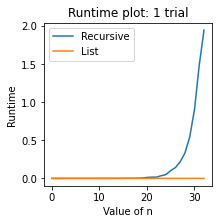

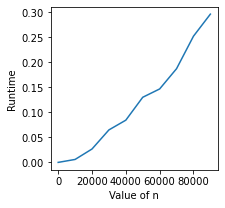

In [17]:
plotruntimes([Fib,Fib2],["Recursive","List"],range(33),1)
plotruntime(Fib2,range(1,100000,10000),1)

Looking at the results, `Fib` is looks like an exponential curve as expected, while `Fib2` does not look like a line, it seems to be growing a little faster.

Why is this? Well, look at the line of code:

`A.append(A[-1]+A[-2])`

What does this do? It adds two numbers. For example to compute the 5th number it will add 2 and 3. To computer the 100th it will add the 99th and the 98th, which are 218922995834555169026 and 135301852344706746049. If you were doing this on paper, wouldn't you take longer for the first addition than the second? Certainly. Guess that, the computer does as well. This shows how you need to be careful, that even simple looking things like + on integers will take varying amounts of time depending on how big the inputs are.

This is more of a issue in Python than in other languages. For example in C++, adding two numbers does not really depend on what the numbers are. What is C++'s magic? It is very simple, it does not allow large numbers.
It places a hard limit, typically $2^{32}$ or $2^{64}$ on the largest allowable integer, which is based on the ability physical circuits on a CPU to add numbers. What is $2^{64}$? 18446744073709551616. Thus C++ would not be able to compute large Fibonacci numbers using its normal way of storing integers without using a specialized library to handle large numbers.


# Motivation: Dropbox-like services

You all should be familiar with services like dropbox. You should also have heard of [Amazon S3](https://aws.amazon.com/s3/), which is part of Amazon Web services and is a leading provider of storage. Many you know use S3 (netflix, reddit, pintrist, etc) Until 2015, Dropbox used S3. 

S3 has a lot of data. It appears to be a secret exactly how much, but given that they offer a product called [Amazon Snowmobile](https://aws.amazon.com/snowmobile/) which is basically a giant truck-sized UBS drive that holds 100PB=100,000TB=100,000,000GB that you can use to deposit data, that is a lot!

S3 is not free. You pay per transaction (very small) and to transfer data out. This costs $0.05 per GB.

Now, suppose you are dropbox. Dropbox charges €120 per year to store 2TB. At S3's pricing, this would cost €100 to transfer the data just once. This does not sound like a great business, especially since many users have their files on several computers.

One way Dropbox can be efficient is to detect if a file exists already so it does not have to transfer it. But if Dropbox's server has some files and a computer has some files, how do we determine if there are any duplicates that do not need to be transferred? And of course, we don't want to transfer them to determine this.

As this is day 1, lets simplify this very much. Suppose you have two collections of files, and you want to see if there are any in common. This removes the network aspect of this and lets us explore how to solve it in plain old python. We will also simplify and represent files by lists of characters. Before we even try to solve this, lets look at the runtime to determine if two lists are the same.

# Determining if two lists of characters are the same

Here we are going to look at the time to figure out whether or not two lists of characters are the same. In python this is simply the code `A==B` where `A` and `B` are lists. We will see that this will depend on how similar they are. First, some code to make a random list of characters, using the [random](https://docs.python.org/3/library/random.html) library: 

In [18]:
import string
import random

def randomListOfChars(length):
    letters = "qwertyuiopasdfghjklzxcvbnnm"
    return [random.choice(letters) for i in range(length)]

print(randomListOfChars(10))

['z', 'n', 'i', 'i', 'b', 'm', 'y', 'q', 'r', 'p']


Next, lets make some lists of lists of characters of increasing lengths. First we make two that are completely random, and then we make two that share the same first half.

In [19]:
dataA= [randomListOfChars(i) for i in range(10000)]
dataB= [randomListOfChars(i) for i in range(10000)]

prefix=randomListOfChars(10000)
dataC= [prefix[:i//2]+randomListOfChars(i//2) for i in range(10000)]
dataD= [prefix[:i//2]+randomListOfChars(i//2) for i in range(10000)]

Observe that dataC and dataD share the same first half

In [20]:
for i in range(2,10,2):
    print("dataA["+str(i)+"]: "+str(dataA[i]))
    print("dataB["+str(i)+"]: "+str(dataB[i]))
    print("dataC["+str(i)+"]: "+str(dataC[i]))
    print("dataD["+str(i)+"]: "+str(dataD[i]))    

dataA[2]: ['n', 'g']
dataB[2]: ['s', 'w']
dataC[2]: ['j', 'b']
dataD[2]: ['j', 't']
dataA[4]: ['v', 'u', 'd', 'n']
dataB[4]: ['f', 's', 'n', 'i']
dataC[4]: ['j', 't', 'h', 'r']
dataD[4]: ['j', 't', 'l', 'e']
dataA[6]: ['k', 'v', 'j', 'l', 'k', 'w']
dataB[6]: ['d', 'j', 'i', 'm', 'o', 'c']
dataC[6]: ['j', 't', 'y', 'g', 'n', 'b']
dataD[6]: ['j', 't', 'y', 'b', 'r', 'n']
dataA[8]: ['y', 'v', 'u', 'v', 'o', 'e', 'c', 'y']
dataB[8]: ['h', 'e', 'd', 'f', 'v', 'x', 'o', 'a']
dataC[8]: ['j', 't', 'y', 't', 'r', 'x', 's', 'm']
dataD[8]: ['j', 't', 'y', 't', 'r', 'm', 'b', 'v']


Now, here is a simple function to test to see if the nth element of A and B are the same

In [21]:
def nthSame(A,B,n):
    return A[n]==B[n]


print(dataA[6],dataB[6]," same? ",nthSame(dataA,dataB,6))
print(dataC[6],dataC[6]," same? ",nthSame(dataC,dataC,6))

['k', 'v', 'j', 'l', 'k', 'w'] ['d', 'j', 'i', 'm', 'o', 'c']  same?  False
['j', 't', 'y', 'g', 'n', 'b'] ['j', 't', 'y', 'g', 'n', 'b']  same?  True


Now, lets try plotting nthSame with different values of n and the different sets. We will do three experiments.

- `dataA[n] == dataB[n]`: These are both random, so they are almost certainly different, and so probably this will not take much time to determine as they will almost certainly differ in one of the first elements
- `dataA[n] == dataA[n]`: These are the same, so this should take a long time as you need to look at all the elements of the list to make sure they are the same.
- `dataA[n] == dataA[n]`: There are same in the first half, but different in the second. Thus the runtime should be halfway between the first two experiments.

So, lets run the experiment:

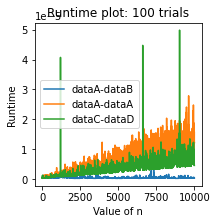

In [22]:
plotruntimes([lambda n :nthSame(dataA,dataB,n),
             lambda n :nthSame(dataA,dataA,n),
             lambda n :nthSame(dataC,dataD,n)],
             ["dataA-dataB","dataA-dataA","dataC-dataD"],range(10000),100)

The results are exactly as expected.

# Any records in common?

We need to set up the data that we will use to test our ideas to see if given two lists, there are any elements in common.

We are going to create two lists of size 100,000, recordsA and recordsB. Each of these lists contains a list of 100 chars, the first 50 are the same for all and the last 50 are random.

In [23]:
prefix=randomListOfChars(50)
def randomRecords(number):
    return [prefix+randomListOfChars(50) for x in range(number) ]       

In [24]:
recordsA=randomRecords(100000)
recordsB=randomRecords(100000)

In [25]:
print(recordsA[0])
print(recordsB[500])

['g', 'x', 'r', 'h', 'm', 'e', 'q', 'y', 'x', 'c', 'j', 'b', 'y', 'n', 't', 'n', 'r', 'd', 'v', 'u', 'g', 'r', 'a', 'v', 'z', 's', 'r', 'k', 'a', 'r', 'l', 'n', 'a', 'c', 'z', 'x', 's', 'f', 'o', 's', 'v', 'e', 'k', 'x', 'i', 'h', 'q', 'z', 'b', 't', 'p', 'k', 'k', 'e', 'k', 'l', 's', 'c', 'n', 'h', 'o', 'g', 's', 'l', 'm', 'f', 'b', 'f', 'q', 'k', 'k', 'f', 'n', 'r', 'x', 'c', 'q', 'b', 't', 't', 'd', 'a', 'k', 'd', 'r', 'h', 'o', 's', 'g', 'n', 'g', 'm', 'n', 't', 'f', 'c', 'p', 's', 'a', 'b']
['g', 'x', 'r', 'h', 'm', 'e', 'q', 'y', 'x', 'c', 'j', 'b', 'y', 'n', 't', 'n', 'r', 'd', 'v', 'u', 'g', 'r', 'a', 'v', 'z', 's', 'r', 'k', 'a', 'r', 'l', 'n', 'a', 'c', 'z', 'x', 's', 'f', 'o', 's', 'v', 'e', 'k', 'x', 'i', 'h', 'q', 'z', 'b', 't', 'y', 'p', 'h', 'h', 'v', 'l', 'w', 'v', 'n', 'p', 'n', 'w', 'k', 'g', 'p', 'a', 'o', 'e', 'g', 'n', 'a', 'r', 'w', 'k', 'r', 'q', 'c', 'g', 'a', 'o', 'm', 'c', 't', 'y', 'u', 'e', 'n', 'b', 'r', 'n', 'p', 'b', 'k', 'w', 'v', 'r', 'd', 's', 'r', 'c'

## Attempt 1:

Now, our main goal is to write code to determine if recordsA and recordsB have something in common. Let's start with the most obvious way to do this.

In [26]:
def inCommon1(A,B):
    for a in A:
        for b in B:
            if a==b:
                return True
    return False

Now, let's test this. We test this on the first `n` records of `recordsA` and `recordsB` for varying values of `n`. What do we expect in such a case? The code has two nested loops of size `n`, so we would expect a quadratic runtime.

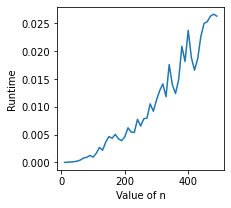

In [27]:
plotruntime(lambda n :inCommon1(recordsA[:n],recordsB[:n]),range(10,500,10),3)

Unsurprisingly this looks like a parabola. 

How much time would this take to check the full 100,000? Let's try to estimate this. The runtime appears to look like a parabola of the form $T(N)=\alpha N^2$. As $T(500)=0.02$, this means $0.02=\alpha 500^2$ and thus $\alpha=\frac{0.02}{500^2}=.00000008$. Knowing this, the time for 10,000 would be $T(10000)=.00000008\cdot100000^2=800$.

Each of `recordsA` and `recordsB` has 10 megabytes of data. This is not exactly big data! And 800 seconds, 12 minutes, is a long time to see if there is a duplicate record. If we had a gigabyte of data, that is 10 million records of size 100, our code would run a 10,000 times slower and take three months to finish!

## Attempt 2

Perhaps you know that you can write `x in A` which returns true or false depending on whether `x` is in the list `a`. So let's remove the second for loop and replace it with an `if` using `in`.

In [28]:
def inCommon2(A,B):
    for a in A:
        if a in B:
            return True
    return False

So we have eliminated one of the loops. Does this speed it up?

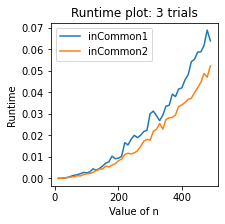

In [29]:
plotruntimes([lambda n :inCommon1(recordsA[:n],recordsB[:n]),
              lambda n :inCommon2(recordsA[:n],recordsB[:n]),
             ],["inCommon1","inCommon2"],range(10,500,10),3)

The runtimes are almost the same. There is no magic here, as the only way python can determine if `a in B` is true is to loop through the elements of `B`. Thus is `in` statement is really just a shortcut for writing out the whole loop.

## Attempt 3

For the third attempt, we make the following simple observation: If you are looking for duplicates in a sorted list, they are next to each other. This gives rise to the following algorithm: first sort, then scan once to check for duplicates. This is easily coded as lists in python have a built-in sort method.

In [30]:
def inCommon3(A,B):
    C=A+B
    C.sort()
    for i in range(len(C)-1):
        if C[i]==C[i+1]:
            return True
    return False

What sort of runtime do we expect? Indexing a list is a fast constant-time operation, and sorting takes time proportional to $n \log n$, which is much closer to $n$ than $n^2$. So we hope that Attempt 3 is much faster.

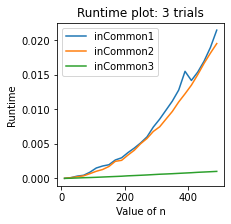

In [54]:
plotruntimes([lambda n :inCommon1(recordsA[:n],recordsB[:n]),
              lambda n :inCommon2(recordsA[:n],recordsB[:n]),
              lambda n :inCommon3(recordsA[:n],recordsB[:n]),
             ],["inCommon1","inCommon2","inCommon3"],range(10,500,20),3)

And, in fact it is fast. Fast enough that we can try it on the whole data set, just just on the first 500 values.

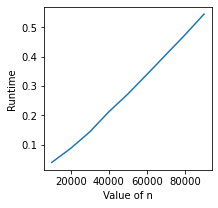

In [22]:
plotruntime(lambda n :inCommon3(recordsA[:n],recordsB[:n]),range(10000,100000,10000),1)

This looks pretty good, something close to linear, which is what we expected.

## A detour: hash functions

One of the fundamental ways of dealing with big data is to make it smaller, and one of the classic ways to do this is via a hash function.

A ideal hash function takes some data and turns it into a number within a certain range $[1..r]$. The simple idea is that if `hash` is a hash function then if $hash(x)\not = hash(y)$ then $x \not = y$, and if $hash(x)=hash(y)$ then usually $x=y$. I say usually, as there is a small chance ($\frac{1}{r}$) that 
$hash(x) = hash(y)$ but $x \not = y$. This is called a *hash collision$ when this happens.

Python has built in hashing, which works on anything that you can not change. So, it works on strings and tuples, but not lists. However, you can easily convert a list to a tuple. 

There are no ideal practical hash functions. Python's built-in hashing is fast, but you should assume collisions could happen. To be more sure that a collision is avoided one should use a [cryptographic hash function](cryptographic hash function). Understanding how these work is a entirely [different subject](https://www.ulb.be/fr/programme/info-f405), but know that there is a [python library](https://pycryptodome.readthedocs.io/en/latest/src/hash/hash.html) where you can find these hash functions. The current best is [SHA3](https://en.wikipedia.org/wiki/SHA-3) which was invented by thee people including Gilles Van Assche, who teaches the Crypto course at ULB.

In [55]:
print(hash("hello"))

print(hash( (3,4) ))

A="hello"
print(hash(A))

#Does not work!
#print(hash([1,2,3]))

print(hash(tuple([1,2,3])))


7717164688969196745
1079245023883434373
7717164688969196745
529344067295497451


## Attempt 4

Ok, so how can these hash functions help us? What was the expensive step in attempt 3? The sort: `C.sort()`. What was `C` again? It was a list where each item was a list of length 100. What if trying to sort lists of length 100, we simply replace the lists of length 100 with the hash of the list of length 100? We would get the following code:

In [9]:
def inCommon4a(A,B):
    C=[hash(tuple(c)) for c in A+B]
    C.sort()
    for i in range(len(C)-1):
        if C[i]==C[i+1]:
            return True
    return False

This has one problem though, what if there is a has collision? That is suppose there is something in `A` and something in `B` which are different but that hash to the same value. In this case True will be returned in error. If we are OK with this kind of error then we can stop, but if we are not ok, we need to be a bit more sophisticated. We can not just ignore the data and look at the hashes, but we can certainly save time by looking only at the data when the hashes are equal.

I have not talked about really what sorting does to lists and tuples. Here is an example.

In [25]:
A=[(hash(x),x) for x in ["dog","cat","panda","sloth"]]
print(sorted(A))

[(-1668627386296027356, 'panda'), (2454414626128592326, 'cat'), (3176937156735910765, 'sloth'), (7224905237680152759, 'dog')]


To sort a tuple or list, python uses what is known as *Lexicographic order*, which is the same order one used in a dictionary. Meaning, it sorts based on the first element, and if there are any ties it resolves them using the order of the second element, etc. So, by putting the hash as the first element of a tuple, python's sorting method will only look at the second element if there are identical first elements. Which is exactly what we want:

In [10]:
def inCommon4(A,B):
    C=[(hash(tuple(c)),c) for c in A+B]
    C.sort()
    for i in range(len(C)-1):
        if C[i]==C[i+1]:
            return True
    return False


In [11]:
plotruntimes([lambda n :inCommon3(recordsA[:n],recordsB[:n]),
              lambda n :inCommon4(recordsA[:n],recordsB[:n]),
              lambda n :inCommon4a(recordsA[:n],recordsB[:n]),
             ],["inCommon3","inCommon4","inCommon4a"],range(10000,100000,10000),1)

NameError: name 'plotruntimes' is not defined

These runtimes are what you would expect. Incommon 4 and 4a are faster, with 4 being slightly worse due to the added complexity of the tuple. Remember that our records were of size 100. You would expect that if these were changed to be of size 10000, Incommon3 would become 100 times slower and while 4/4a would stay the same. I didn't do this experiment, but perhaps you could!

# Conclusion

Hashing is the answer. By transmitting the hash values rather than the files themselves, one can very easily check whether a file needs to be transmitted or not.

https://www.dropbox.com/developers/reference/content-hash

For example, I have 253GB in my Dropbox account, in 240,139 files. Dropbox uses the hash function SHA256 which hashes each file to 256 bits, which is 32 bytes. So the hashes of all my files could be transmitted in a 8MB file, which is 0.003% of the size of the total data set.





# Homework

Homework. Homework will not be graded. I will go over it in class if there is some interest. The exam will be written assuming you have done all the HW.


## Question 1.1


In our `Fib1` code, to compute the `n`th Fibonacci number, we keep a list with all the Fibonacci numbers up to and including the `n`th. This uses a lot of space. Actually, we can computer exactly how much:

In [16]:
def Fib2(N):
    A=[0,1]
    for i in range(N-1):
        A.append(A[-1]+A[-2])
    return A[N]
    
for N in range(40):
    print("Fib2(",N,") is ",Fib2(N))

Fib2( 0 ) is  0
Fib2( 1 ) is  1
Fib2( 2 ) is  1
Fib2( 3 ) is  2
Fib2( 4 ) is  3
Fib2( 5 ) is  5
Fib2( 6 ) is  8
Fib2( 7 ) is  13
Fib2( 8 ) is  21
Fib2( 9 ) is  34
Fib2( 10 ) is  55
Fib2( 11 ) is  89
Fib2( 12 ) is  144
Fib2( 13 ) is  233
Fib2( 14 ) is  377
Fib2( 15 ) is  610
Fib2( 16 ) is  987
Fib2( 17 ) is  1597
Fib2( 18 ) is  2584
Fib2( 19 ) is  4181
Fib2( 20 ) is  6765
Fib2( 21 ) is  10946
Fib2( 22 ) is  17711
Fib2( 23 ) is  28657
Fib2( 24 ) is  46368
Fib2( 25 ) is  75025
Fib2( 26 ) is  121393
Fib2( 27 ) is  196418
Fib2( 28 ) is  317811
Fib2( 29 ) is  514229
Fib2( 30 ) is  832040
Fib2( 31 ) is  1346269
Fib2( 32 ) is  2178309
Fib2( 33 ) is  3524578
Fib2( 34 ) is  5702887
Fib2( 35 ) is  9227465
Fib2( 36 ) is  14930352
Fib2( 37 ) is  24157817
Fib2( 38 ) is  39088169
Fib2( 39 ) is  63245986


In [10]:
import sys

def spaceUsedByFib2(N):
    A=[0,1]
    for i in range(N-1):
        A.append(A[-1]+A[-2])
    return sys.getsizeof(A)+sum(sys.getsizeof(x) for x in A)

spaceUsedByFib2(10000)

4967304

So, almost five million bytes are needed. In algorithm analysis, there are two main ways we evaluate an algorithm. The first, and most common, is the runtime. The second is the space. Space is typically quite expensive (look again at the EC2 pricing), and if you use more space than available memory then your program will hit a wall and slow down dramatically. 

So, this question is, write a way to compute the `n`th Fibonacci number that uses much less space than Fib2. Think, do you really need to keep everything in `A[]`?

In [15]:
def Fib3(N):
    A=[0,1]
    for i in range(N-1):
        A.append(A[-1]+A[-2])
        A = A[-2:]
    return A[-1]
    
for N in range(40):
    print("Fib2(",N,") is ",Fib3(N))

Fib2( 0 ) is  1
Fib2( 1 ) is  1
Fib2( 2 ) is  1
Fib2( 3 ) is  2
Fib2( 4 ) is  3
Fib2( 5 ) is  5
Fib2( 6 ) is  8
Fib2( 7 ) is  13
Fib2( 8 ) is  21
Fib2( 9 ) is  34
Fib2( 10 ) is  55
Fib2( 11 ) is  89
Fib2( 12 ) is  144
Fib2( 13 ) is  233
Fib2( 14 ) is  377
Fib2( 15 ) is  610
Fib2( 16 ) is  987
Fib2( 17 ) is  1597
Fib2( 18 ) is  2584
Fib2( 19 ) is  4181
Fib2( 20 ) is  6765
Fib2( 21 ) is  10946
Fib2( 22 ) is  17711
Fib2( 23 ) is  28657
Fib2( 24 ) is  46368
Fib2( 25 ) is  75025
Fib2( 26 ) is  121393
Fib2( 27 ) is  196418
Fib2( 28 ) is  317811
Fib2( 29 ) is  514229
Fib2( 30 ) is  832040
Fib2( 31 ) is  1346269
Fib2( 32 ) is  2178309
Fib2( 33 ) is  3524578
Fib2( 34 ) is  5702887
Fib2( 35 ) is  9227465
Fib2( 36 ) is  14930352
Fib2( 37 ) is  24157817
Fib2( 38 ) is  39088169
Fib2( 39 ) is  63245986


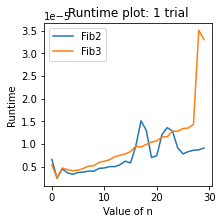

In [18]:
plotruntimes([Fib2,Fib3],["Fib2","Fib3"],range(30),1)

## Question 1.2

Python has a `set` class. Read the [docs](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) and code two versions of `incommon` that use the `set` class. How does it compare to the other solutions?


In [29]:
def inCommon4a(A,B):
    C=[hash(tuple(c)) for c in A+B]
    C.sort()
    for i in range(len(C)-1):
        if C[i]==C[i+1]:
            return True
    return False

In [30]:
def incommon5(A,B):
    C = [hash(frozenset(c)) for c in A+B]
    C.sort()
    for i in range(len(C)-1):
        if C[i]==C[i+1]:
            return True
    return False



In [40]:
def inCommon5a(A,B):
    C=[set(c) for c in A+B]
    C.sort()
    for i in range(len(C)-1):
        if C[i]==C[i+1]:
            return True
    return False

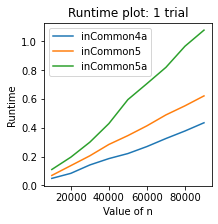

In [41]:
plotruntimes([lambda n :inCommon4a(recordsA[:n],recordsB[:n]),
              lambda n :incommon5(recordsA[:n],recordsB[:n]),
              lambda n :inCommon5a(recordsA[:n],recordsB[:n])
             ],["inCommon4a","inCommon5","inCommon5a"],range(10000,100000,10000),1)

## Question 1.3

Look at this `BigData` function and what it does.

In [162]:
def BigData(n):
    S='BigData'
    T=""
    for i in range(n):
        T=T+S[i%7]
    return T

for i in range(20):
    print(BigData(i))
    


B
Bi
Big
BigD
BigDa
BigDat
BigData
BigDataB
BigDataBi
BigDataBig
BigDataBigD
BigDataBigDa
BigDataBigDat
BigDataBigData
BigDataBigDataB
BigDataBigDataBi
BigDataBigDataBig
BigDataBigDataBigD
BigDataBigDataBigDa


Your tasks are:
- Graph its runtime as a function of `n`
- Discuss how the runtime is growing
- Try to explain why it is growing how it is
- Code something much faster and repeat the first three steps above

In [165]:
import timeit
import matplotlib.pyplot as plt
import random


def plotruntime(f,r,trials=1,figsize=[3,3]):
    Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
    print(r)
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(r,Times)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")

range(0, 20)


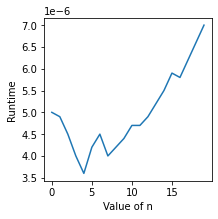

In [166]:
plotruntime(BigData,range(20),1)

In [170]:
def BigData2(n):
    S='BigData'
    return S[:n]

for i in range(1,20):
    print(BigData(i))

B
Bi
Big
BigD
BigDa
BigDat
BigData
BigDataB
BigDataBi
BigDataBig
BigDataBigD
BigDataBigDa
BigDataBigDat
BigDataBigData
BigDataBigDataB
BigDataBigDataBi
BigDataBigDataBig
BigDataBigDataBigD
BigDataBigDataBigDa


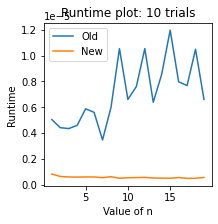

In [175]:
plotruntimes([BigData,BigData2],["Old","New"],range(1,20),10)